In [54]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install selenium

In [3]:
# import requests
# import time

# jumlah_halaman = 5  # Ganti sesuai kebutuhan

# for page in range(1, jumlah_halaman + 1):
#     url = f'https://www.mobil123.com/mobil-dijual/indonesia?page={page}'
#     user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36'

#     response = requests.get(url, headers={'user-agent': user_agent})

#     print(f'\nScraping page {page}...')

#     if response.ok:
#         print(f"Status Code: {response.status_code} - OK")
#         # Di sini proses parsing HTML bisa dilakukan (gunakan BeautifulSoup)
#     else:
#         print(f"Status Code: {response.status_code} - Gagal")

#     # Jeda antar request agar tidak membebani server
#     time.sleep(1)



Scraping page 1...
Status Code: 200 - OK

Scraping page 2...
Status Code: 200 - OK

Scraping page 3...
Status Code: 200 - OK

Scraping page 4...
Status Code: 200 - OK

Scraping page 5...
Status Code: 200 - OK


In [117]:
type(response.content)

bytes

In [55]:
from bs4 import BeautifulSoup

html = response.content
#parser = 'lxml'

soup = BeautifulSoup(html, "html.parser")
type(soup)

bs4.BeautifulSoup

In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36'
headers = {'User-Agent': user_agent}

tahun_mulai = 2003
tahun_akhir = 2024
jumlah_halaman = 3  

data_mobil = []

for tahun in range(tahun_mulai, tahun_akhir + 1):
    print(f"\n📆 Tahun {tahun}")
    for page in range(1, jumlah_halaman + 1):
        url = f"https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number={page}&min_year={tahun}&max_year={tahun}"
        print(f"  🔗 Page {page}: {url}")

        response = requests.get(url, headers=headers)
        if response.ok:
            soup = BeautifulSoup(response.text, 'html.parser')

            nama_tags = soup.find_all("h2", class_='listing__title')
            harga_tags = soup.find_all("div", class_='listing__price')

            jumlah_data = min(len(nama_tags), len(harga_tags))
            for i in range(jumlah_data):
                # Nama dan link
                a_tag = nama_tags[i].find('a')
                if a_tag:
                    nama = a_tag.get_text(strip=True)
                    link = a_tag['href']
                    if not link.startswith('http'):
                        link = 'https://www.mobil123.com' + link
                else:
                    nama = "N/A"
                    link = "N/A"

                # Harga
                harga_text = harga_tags[i].get_text(strip=True)
                harga_bersih = re.sub(r'\D', '', harga_text)
                try:
                    harga = int(harga_bersih)
                except:
                    harga = None

                # Simpan
                data_mobil.append({
                    'Tahun': tahun,
                    'Nama Mobil': nama,
                    'Harga': harga,
                    'Link Detail': link
                })
        else:
            print(f"❌ Gagal mengambil halaman {page} untuk tahun {tahun}")

        time.sleep(1)

# Simpan ke DataFrame
df = pd.DataFrame(data_mobil)
print(f"\n✅ Total data mobil terkumpul: {len(df)}")
print(df.head())

# Optional simpan ke file
df.to_csv("mobil_bekas_pertahun.csv", index=False)



📆 Tahun 2003
  🔗 Page 1: https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number=1&min_year=2003&max_year=2003
  🔗 Page 2: https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number=2&min_year=2003&max_year=2003
  🔗 Page 3: https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number=3&min_year=2003&max_year=2003

📆 Tahun 2004
  🔗 Page 1: https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number=1&min_year=2004&max_year=2004
  🔗 Page 2: https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number=2&min_year=2004&max_year=2004
  🔗 Page 3: https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number=3&min_year=2004&max_year=2004

📆 Tahun 2005
  🔗 Page 1: https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number=1&min_year=2005&max_year=2005
  🔗 Page 2: https://www.mobil123.com/mobil-bekas-dijual/indonesia?page_size=25&page_number=2&min_year=2005&max_

In [57]:
print(df.head(10))

   Tahun                                         Nama Mobil      Harga  \
0   2003               2003 Suzuki Karimun 1.0 DX Hatchback   65000000   
1   2003      2003 Suzuki Karimun 1.0 DX Hatchback - Manual   57000000   
2   2003  2003 Toyota Kijang 2.0 Minibus GL Long (LGX) M...   75000000   
3   2003  2003 Toyota Kijang 2.4 Minibus STD Long (LX) M...   77000000   
4   2003                   2003 Nissan X-Trail 2.5 SUV - ST   70000000   
5   2003                           2003 Volvo S80 2.9 Sedan   79000000   
6   2003                           2003 Volvo S80 2.9 Sedan   79000000   
7   2003  2003 Jeep Grand Cherokee 4.0 Power Tech SUV - ...  350000000   
8   2003                            2003 BMW 520i 2.2 Sedan   85000000   
9   2003  2003 Toyota Kijang 1.8 Minibus GL Long (LGX) M...   87500000   

                                         Link Detail  
0  https://www.mobil123.com/dijual/suzuki-karimun...  
1  https://www.mobil123.com/dijual/suzuki-karimun...  
2  https://www.mobil

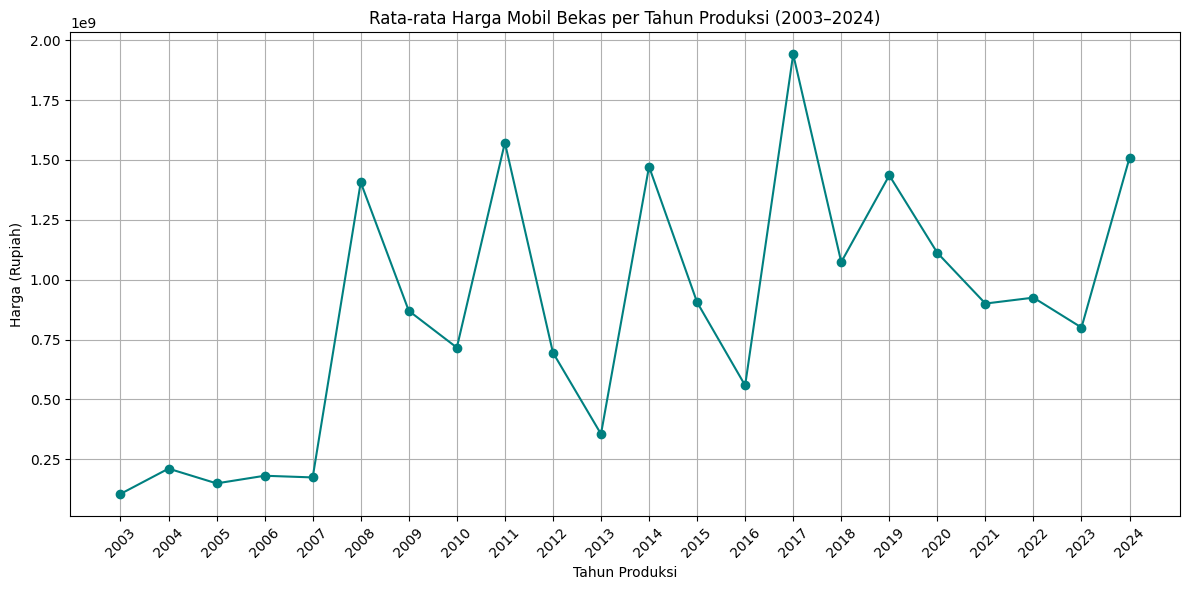

In [58]:
#Visualisasi data per-tahun
import matplotlib.pyplot as plt

df_plot = df.dropna(subset=['Harga'])  # hilangkan data tanpa harga
avg_per_year = df_plot.groupby('Tahun')['Harga'].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_per_year.index, avg_per_year.values, marker='o', linestyle='-', color='teal')
plt.title('Rata-rata Harga Mobil Bekas per Tahun Produksi (2003–2024)')
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga (Rupiah)')
plt.grid(True)
plt.xticks(range(2003, 2025), rotation=45)
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Ambil rata-rata harga per tahun
data = df.groupby('Tahun')['Harga'].mean().dropna().values.reshape(-1, 1)

# Normalisasi harga agar berada di antara 0–1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


In [74]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [61]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Encoder
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class Encoder(Model):
    def __init__(self, latent_dim):
        super().__init__()
        self.dense1 = layers.Dense(8, activation="relu")
        self.z_mean = layers.Dense(latent_dim)
        self.z_log_var = layers.Dense(latent_dim)
        self.sampling = Sampling()

    def call(self, x):
        x = self.dense1(x)
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z

# Decoder
class Decoder(Model):
    def __init__(self, original_dim):
        super().__init__()
        self.dense1 = layers.Dense(8, activation="relu")
        self.output_layer = layers.Dense(original_dim, activation="sigmoid")

    def call(self, z):
        x = self.dense1(z)
        return self.output_layer(x)

# VAE
class VAE(Model):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]

        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            # Loss
            reconstruction_loss = tf.reduce_mean(tf.square(data - reconstruction))
            kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {"loss": total_loss}


In [62]:
vae = VAE(Encoder(latent_dim=2), Decoder(original_dim=1))
vae.compile(optimizer='adam')
vae.fit(data_scaled, epochs=50, batch_size=4)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0752
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0908 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0764 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0745 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0543 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0795 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0903 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0978 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0711 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0781 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0798 
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0895 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0786 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0800 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0757 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━

In [73]:
vae.save('vae_model.h5')
encoder.save('encoder_model.h5')
decoder.save('decoder_model.h5')

In [66]:
# Encoder Model untuk dapatkan latent vector
encoder = Model(inputs, z)

# Ambil representasi laten
z_points = encoder.predict(data_scaled)

# Decoder Model untuk generate kembali harga dari z
latent_inputs = layers.Input(shape=(latent_dim,))
x_decoded = decoder_h(latent_inputs)
x_out = decoder_out(x_decoded)
decoder = Model(latent_inputs, x_out)

# Generate data baru
generated = decoder.predict(np.random.normal(size=(5, latent_dim)))
generated_original = scaler.inverse_transform(generated)

print("Harga mobil sintetis:", generated_original)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Harga mobil sintetis: [[9.1277664e+08]
 [7.7371347e+08]
 [6.5917414e+08]
 [8.6649485e+08]
 [6.8752192e+08]]


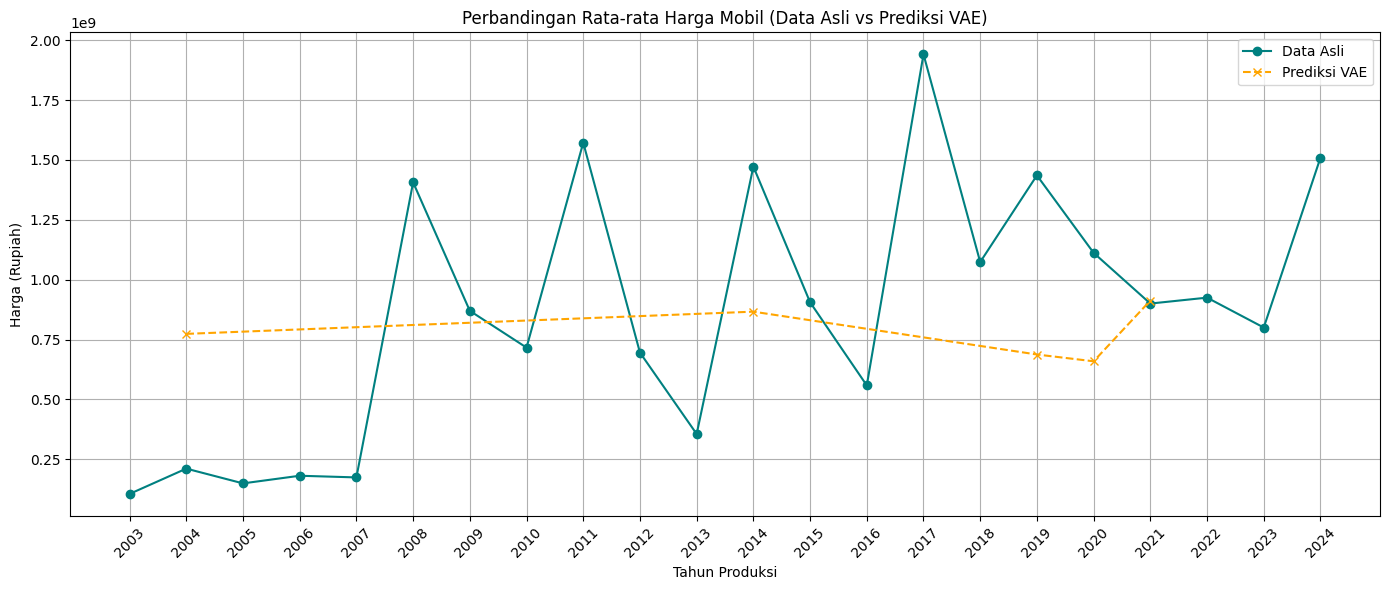

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Misalnya hasil prediksi VAE
vae_generated_prices = generated_original.flatten()

# Buat asumsi tahunnya mengikuti distribusi tahun asli (2003–2024)
tahun_range = np.arange(2003, 2024+1)
generated_years = np.random.choice(tahun_range, size=len(vae_generated_prices))

# Gabungkan ke DataFrame
df_vae = pd.DataFrame({
    'Tahun': generated_years,
    'Harga': vae_generated_prices
})

# Hitung rata-rata per tahun untuk prediksi
avg_vae = df_vae.groupby('Tahun')['Harga'].mean()

# Plot perbandingan
plt.figure(figsize=(14, 6))
plt.plot(avg_per_year.index, avg_per_year.values, marker='o', linestyle='-', label='Data Asli', color='teal')
plt.plot(avg_vae.index, avg_vae.values, marker='x', linestyle='--', label='Prediksi VAE', color='orange')

plt.title('Perbandingan Rata-rata Harga Mobil (Data Asli vs Prediksi VAE)')
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga (Rupiah)')
plt.xticks(tahun_range, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [68]:
generated_list = []

# Loop dari 2003 hingga 2024
for year in range(2003, 2025):
    # Sampling dari latent space
    z_sample = np.random.normal(size=(10, latent_dim))  # generate 10 sampel per tahun
    decoded = decoder.predict(z_sample)
    decoded_original = scaler.inverse_transform(decoded)
    
    # Simpan ke list sebagai DataFrame
    df_temp = pd.DataFrame({
        'Tahun': [year] * len(decoded_original),
        'Harga': decoded_original.flatten()
    })
    generated_list.append(df_temp)

# Gabungkan semua tahun jadi satu DataFrame
df_vae_full = pd.concat(generated_list)

# Hitung rata-rata harga per tahun dari prediksi
avg_vae_full = df_vae_full.groupby('Tahun')['Harga'].mean()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


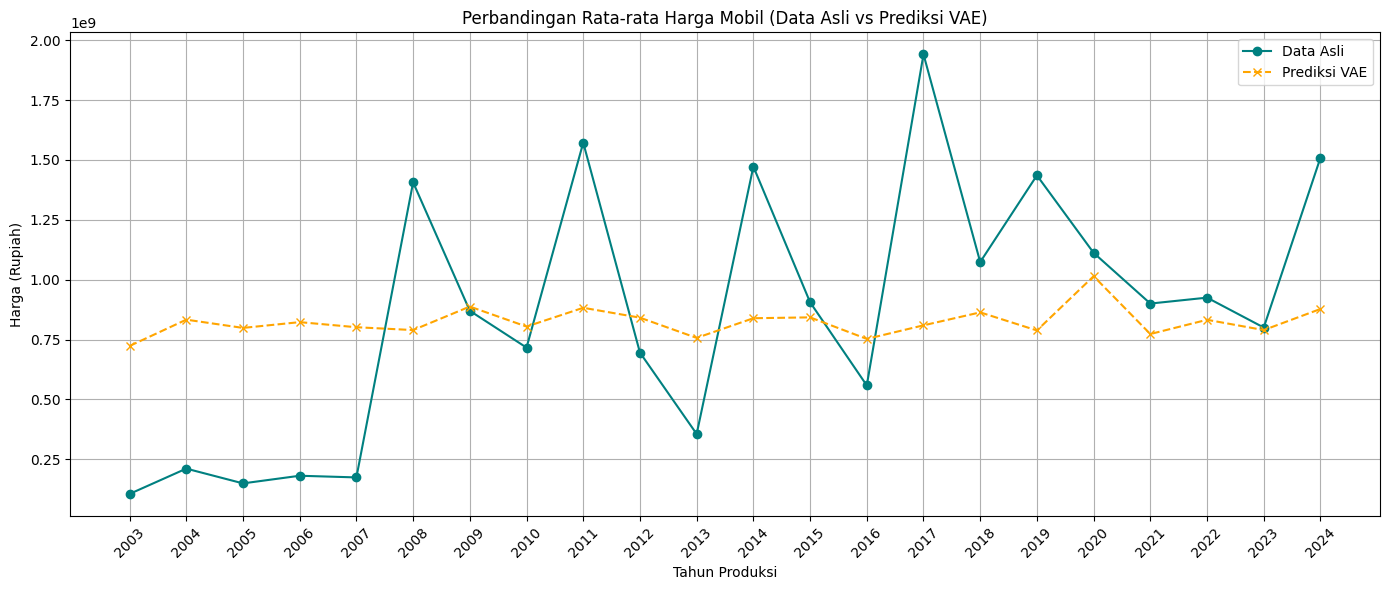

In [69]:
plt.figure(figsize=(14,6))
plt.plot(avg_per_year.index, avg_per_year.values, marker='o', linestyle='-', label='Data Asli', color='teal')
plt.plot(avg_vae_full.index, avg_vae_full.values, marker='x', linestyle='--', label='Prediksi VAE', color='orange')

plt.title('Perbandingan Rata-rata Harga Mobil (Data Asli vs Prediksi VAE)')
plt.xlabel('Tahun Produksi')
plt.ylabel('Harga (Rupiah)')
plt.xticks(np.arange(2003, 2025), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


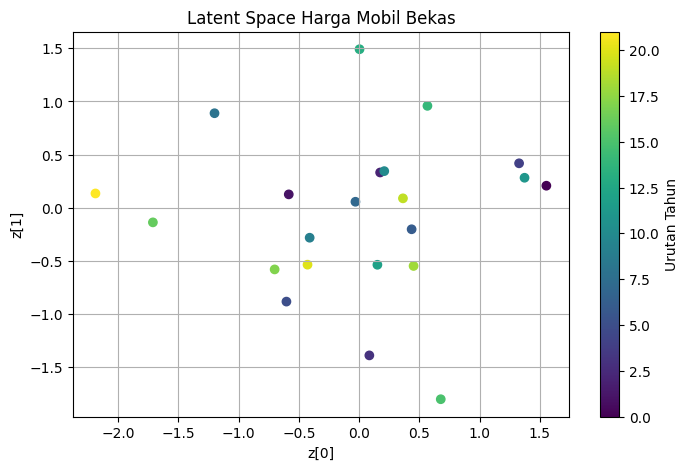

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(z_points[:, 0], z_points[:, 1], c=range(len(z_points)), cmap='viridis')
plt.colorbar(label='Urutan Tahun')
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.title("Latent Space Harga Mobil Bekas")
plt.grid(True)
plt.show()


In [44]:
# import tensorflow as tf
# from tensorflow.keras import layers, Model

# # --- Parameter ---
# input_dim = 1
# latent_dim = 2

# # --- Encoder ---
# inputs = layers.Input(shape=(input_dim,))
# h = layers.Dense(8, activation='relu')(inputs)
# z_mean = layers.Dense(latent_dim, name="z_mean")(h)
# z_log_var = layers.Dense(latent_dim, name="z_log_var")(h)

# # --- Sampling Layer ---
# def sampling(args):
#     z_mean, z_log_var = args
#     epsilon = tf.keras.backend.random_normal(shape=tf.shape(z_mean))
#     return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# # --- Decoder ---
# decoder_h = layers.Dense(8, activation='relu')
# decoder_out = layers.Dense(input_dim, activation='sigmoid')
# h_decoded = decoder_h(z)
# outputs = decoder_out(h_decoded)

# # --- VAE Model ---
# vae = Model(inputs, outputs, name="VAE")

# # --- Loss Function (Reconstruction + KL Divergence) ---
# reconstruction_loss = tf.keras.losses.MeanSquaredError()(inputs, outputs)
# kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
# vae_loss = reconstruction_loss + kl_loss
# vae.add_loss(vae_loss)
# vae.compile(optimizer='adam')


ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.